In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 15.3MB 304kB/s 
     |████████████████████████████████| 6.5MB 42.6MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from wordcloud import WordCloud

In [ ]:
drive.mount('/data/')#, force_remount= True)
data_dir = '/data/My Drive/Comparative Database Project/Data'
!ls '/data/My Drive/Comparative Database Project/Data'

Mounted at /data/
zomato.csv


In [ ]:
data= pd.read_csv(data_dir+'/zomato.csv', encoding='latin1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
data.shape

(9551, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

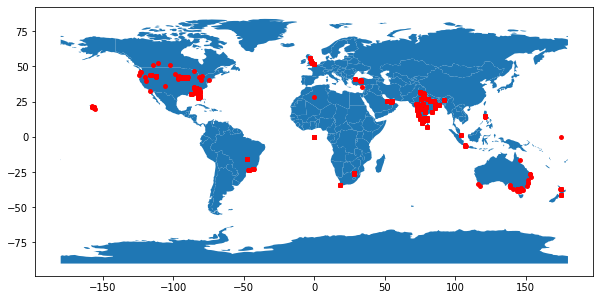

In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

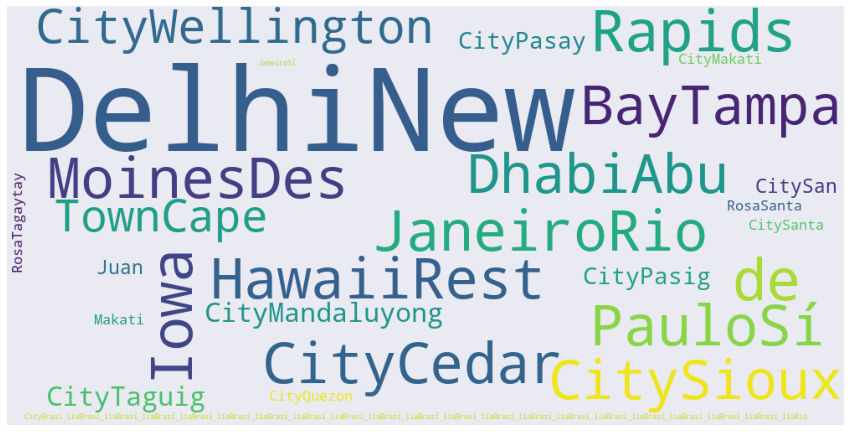

In [ ]:
cities= [city for city in data['City']]

## VISUALIZATION OF RAW INGREDIENTS

unique_string=('').join(cities)
wordcloud= WordCloud(width= 1000, height= 500, background_color = '#eaeaf2', collocations = False).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
data.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
8500,8022,Lajwaab Restaurant,1,Noida,"22, Opposite Bal Bharti School, Jalvayu Vihar ...",Sector 25,"Sector 25, Noida",77.338177,28.584322,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,59,POINT (77.33818 28.58432)
4647,300642,Cravings By Arshi Dhupia,1,New Delhi,"100, Golf Links, Near, Khan Market, New Delhi",Khan Market,"Khan Market, New Delhi",77.227986,28.602557,"Bakery, Desserts, Fast Food",800,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,29,POINT (77.22799 28.60256)
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294,POINT (121.07542 14.64950)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant ID         9551 non-null   int64   
 1   Restaurant Name       9551 non-null   object  
 2   Country Code          9551 non-null   int64   
 3   City                  9551 non-null   object  
 4   Address               9551 non-null   object  
 5   Locality              9551 non-null   object  
 6   Locality Verbose      9551 non-null   object  
 7   Longitude             9551 non-null   float64 
 8   Latitude              9551 non-null   float64 
 9   Cuisines              9542 non-null   object  
 10  Average Cost for two  9551 non-null   int64   
 11  Currency              9551 non-null   object  
 12  Has Table booking     9551 non-null   object  
 13  Has Online delivery   9551 non-null   object  
 14  Is delivering now     9551 non-null   object  
 15  Swit

In [ ]:
## Data transformation: Has table booking, has online delivery, is delivering now switch to order menu, rating color, rating text
data[]= data[].astype()

In [ ]:
## Cuisines:

data.Cuisines.value_counts().to_dict()

{'North Indian': 936,
 'North Indian, Chinese': 511,
 'Chinese': 354,
 'Fast Food': 354,
 'North Indian, Mughlai': 334,
 'Cafe': 299,
 'Bakery': 218,
 'North Indian, Mughlai, Chinese': 197,
 'Bakery, Desserts': 170,
 'Street Food': 149,
 'Pizza, Fast Food': 131,
 'Chinese, Fast Food': 118,
 'Mithai, Street Food': 116,
 'South Indian': 112,
 'Bakery, Fast Food': 108,
 'Chinese, North Indian': 105,
 'Mughlai': 103,
 'Ice Cream, Desserts': 83,
 'Ice Cream': 74,
 'North Indian, Fast Food': 74,
 'Mithai': 71,
 'North Indian, Chinese, Mughlai': 70,
 'North Indian, Chinese, Fast Food': 68,
 'North Indian, Chinese, Continental': 65,
 'Bakery, Desserts, Fast Food': 63,
 'American, Fast Food, Salad, Healthy Food': 62,
 'Mughlai, North Indian': 60,
 'Fast Food, Burger': 56,
 'Biryani': 54,
 'Beverages': 54,
 'Italian': 54,
 'Pizza': 53,
 'Desserts': 53,
 'Chinese, Thai': 51,
 'Raw Meats, North Indian, Fast Food': 49,
 'Finger Food': 49,
 'North Indian, South Indian, Chinese': 46,
 'Fast Food, Nor

In [ ]:
len(list(data['Restaurant Name'].value_counts().to_dict().keys()))

7446

Second Part EDA

In [ ]:
data['Average Cost for two'].value_counts()

500     900
300     897
400     857
200     687
600     652
       ... 
3650      1
8000      1
545       1
4800      1
535       1
Name: Average Cost for two, Length: 140, dtype: int64

Text(0.5, 1.02, 'Average Cost for two')

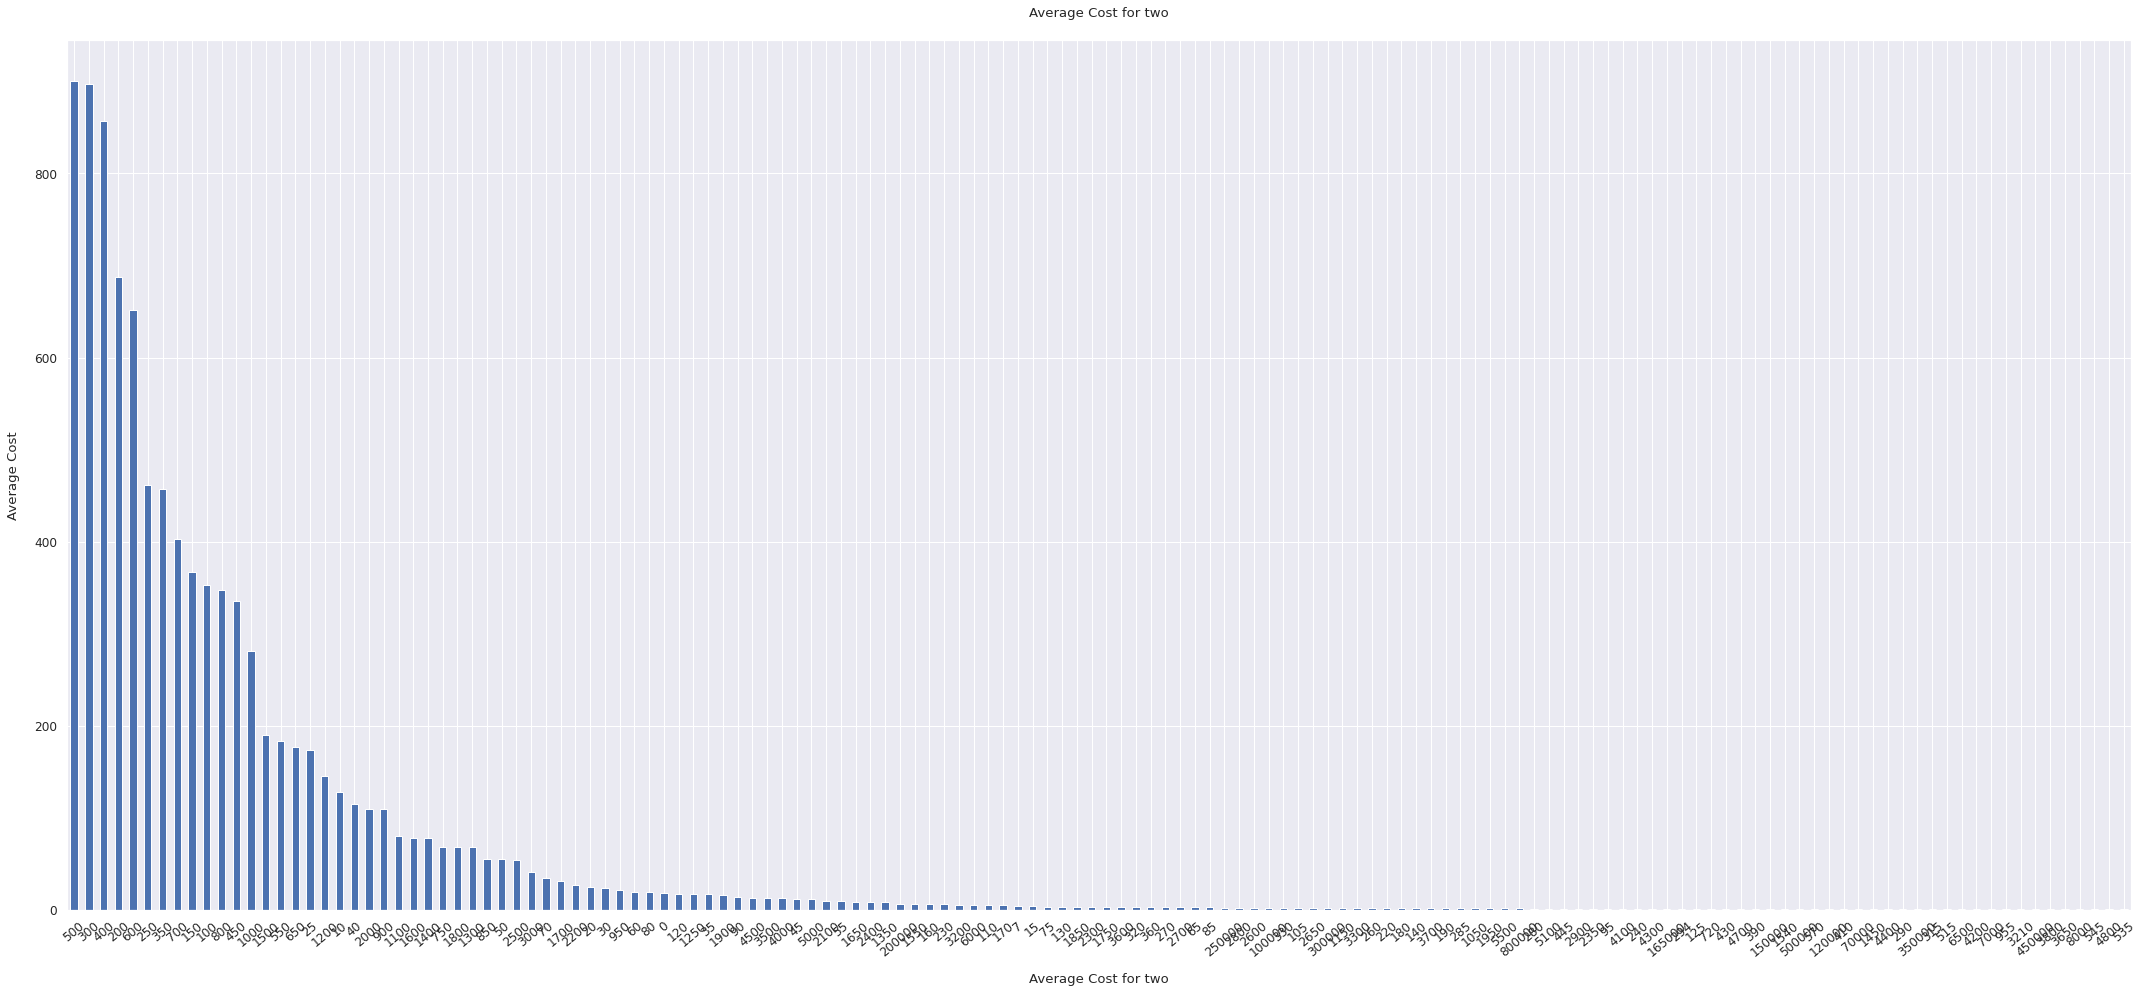

In [ ]:
sns.set(font_scale=1.1)
data['Average Cost for two'].value_counts().plot(kind='bar', figsize=(37, 16), rot=40)
plt.xlabel("Average Cost for two", labelpad=14)
plt.ylabel("Average Cost", labelpad=14)
plt.title("Average Cost for two", y=1.02)

In [ ]:
data['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Rand(R)                     60
Emirati Diram(AED)          60
Brazilian Real(R$)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


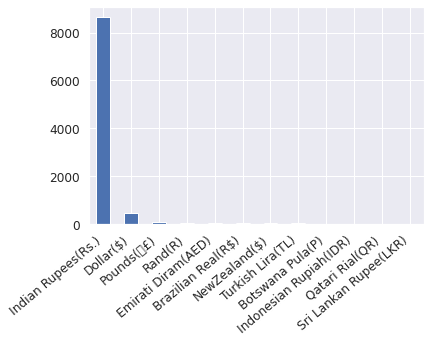

In [ ]:
data['Currency'].value_counts().plot(kind='bar')
plt.xticks(rotation=40, ha='right')

In [ ]:
data['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

No     8393
Yes    1158
Name: Has Table booking, dtype: int64
No     7100
Yes    2451
Name: Has Online delivery, dtype: int64
No     9517
Yes      34
Name: Is delivering now, dtype: int64
No    9551
Name: Switch to order menu, dtype: int64


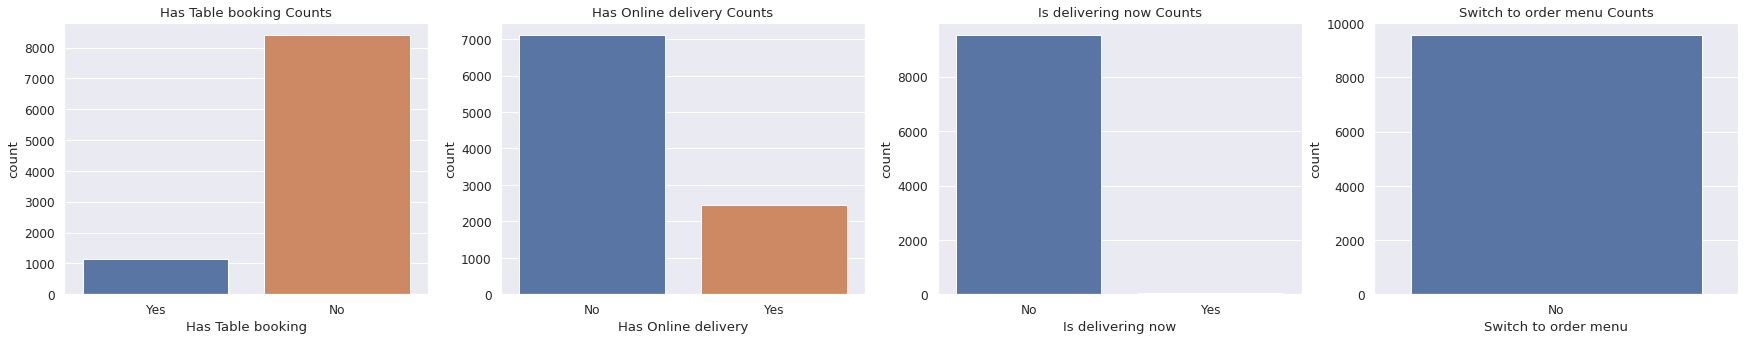

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (30, 5))
sns.countplot(x = 'Has Table booking', data=data, ax = ax[0]);
print(data['Has Table booking'].value_counts())
ax[0].set_title('Has Table booking Counts');

sns.countplot(x = 'Has Online delivery', data=data, ax = ax[1]);
print(data['Has Online delivery'].value_counts())
ax[1].set_title('Has Online delivery Counts');

sns.countplot(x = 'Is delivering now', data=data, ax = ax[2]);
print(data['Is delivering now'].value_counts())
ax[2].set_title('Is delivering now Counts');

sns.countplot(x = 'Switch to order menu', data=data, ax = ax[3]);
print(data['Switch to order menu'].value_counts())
ax[3].set_title('Switch to order menu Counts');

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


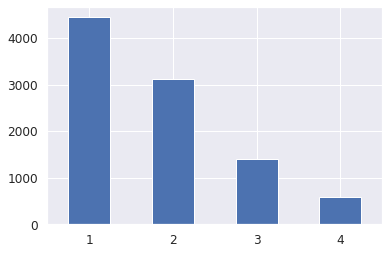

In [ ]:
print(data['Price range'].value_counts())
data['Price range'].value_counts().plot(kind='bar', rot=0)

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

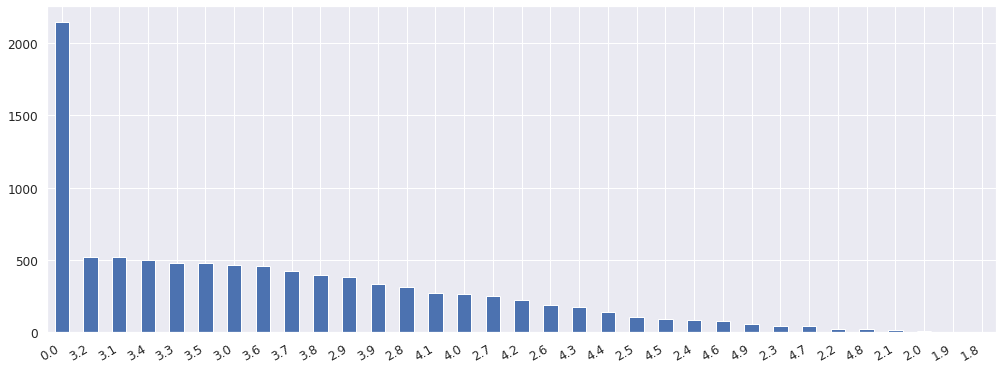

In [ ]:
print(data['Aggregate rating'].value_counts())
data['Aggregate rating'].value_counts().plot(kind='bar', figsize=(17, 6))
plt.xticks(rotation=30, ha='right')

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

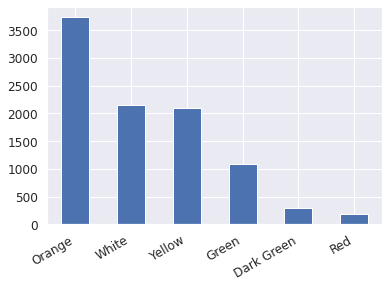

In [ ]:
print(data['Rating color'].value_counts())
data['Rating color'].value_counts().plot(kind='bar')
plt.xticks(rotation=30, ha='right')

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

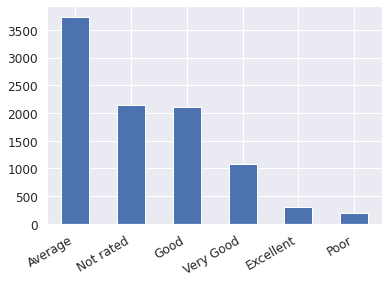

In [ ]:
print(data['Rating text'].value_counts())
data['Rating text'].value_counts().plot(kind='bar')
plt.xticks(rotation=30, ha='right')

In [ ]:
print(data['Votes'].value_counts())

0       1094
1        483
2        327
3        244
4        207
        ... 
284        1
236        1
2213       1
1887       1
1959       1
Name: Votes, Length: 1012, dtype: int64
